In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles, make_moons, make_blobs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [7]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [4]:
## Test Make Blobs for Linear Decision Boundary



xb, yb = make_blobs(n_samples=100, n_features=2, centers=2, 
                    cluster_std=3, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

(-17.98549703838475, 11.517493597371386)

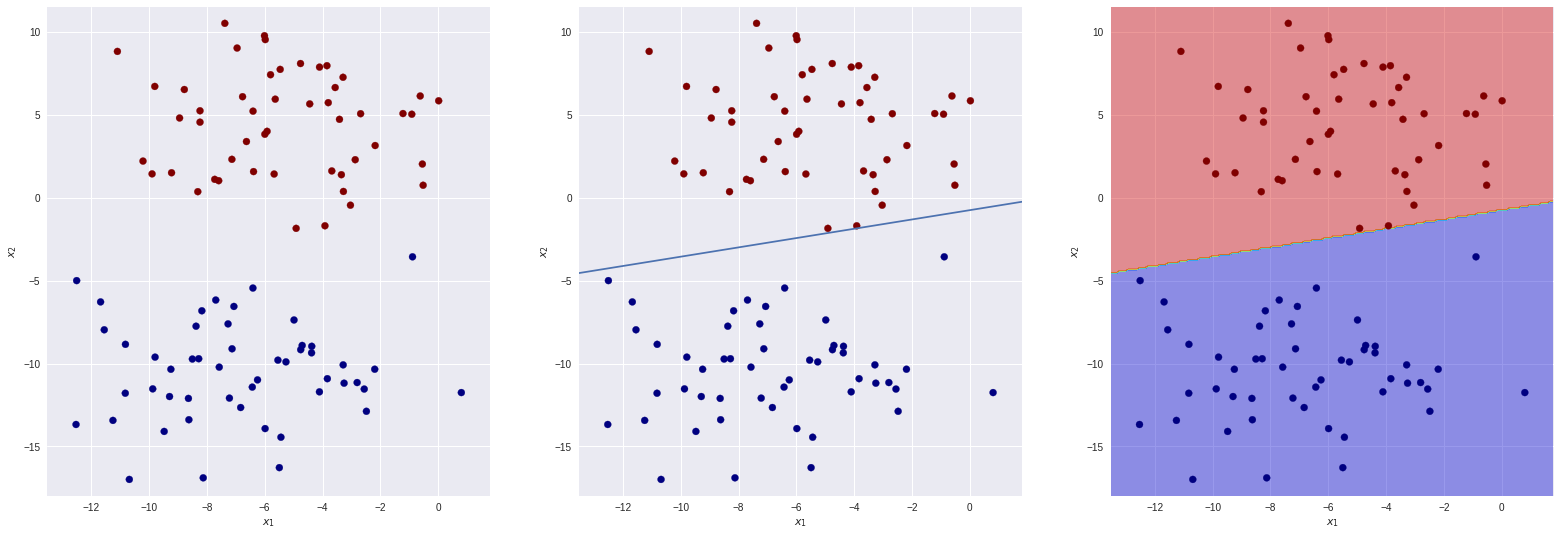

In [5]:
logit = LogisticRegression( random_state=42)
logit.fit( xb, yb)
betas = np.c_[ logit.intercept_, logit.coef_]
betas = betas[0]
y_predict = logit.predict(xb)

logit.score(xb, yb)

betas

## Generate mesh for countour
x_min, x_max = xb[:, 0].min() - 1, xb[:, 0].max() + 1
y_min, y_max = xb[:, 1].min() - 1, xb[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

ZZ = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #mesh_transform
ZZ = ZZ.reshape(xx.shape)

## Decision Boundary
xx_line = np.arange( x_min, x_max, 0.01)
yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]


#plt.figure( figsize = (9,12) )

f, (ax1, ax2, ax3) = plt.subplots( nrows = 1, ncols=3, figsize=(27,9) )  ## sharey = True, sharex=True
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.xlim( x_min-5, x_max+5 )
plt.ylim( y_min-5, y_max+5)

ax1.scatter( xb[:,0], xb[:,1], c = yb, cmap=cm.jet)# Pastel2_r  Vega10_r
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
ax1.set_xlim( x_min, x_max )
ax1.set_ylim(y_min, y_max)

ax2.scatter( xb[:,0], xb[:,1], c = yb, cmap=cm.jet)# Pastel2_r  Vega10_r
ax2.plot(xx_line, yy_line)
ax2.set_xlabel(r'$x_{1}$')
ax2.set_ylabel(r'$x_{2}$')
ax2.set_xlim( x_min, x_max )
ax2.set_ylim(y_min, y_max)

ax3.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
ax3.scatter( xb[:,0], xb[:, 1], c = y_predict, cmap=cm.jet) # y_predict
ax3.set_xlabel(r'$x_{1}$')
ax3.set_ylabel(r'$x_{2}$')
ax3.set_xlim( x_min, x_max )
ax3.set_ylim(y_min, y_max)

In [9]:
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

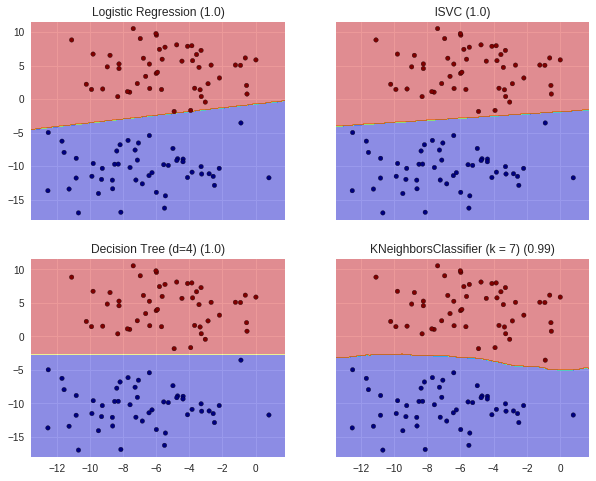

In [11]:
clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = DecisionTreeClassifier(max_depth=4)
clf4 = KNeighborsClassifier(n_neighbors=7)


clf1.fit(xb, yb)
clf2.fit(xb, yb)
clf3.fit(xb, yb)
clf4.fit(xb, yb)

x_min, x_max = xb[:, 0].min() - 1, xb[:, 0].max() + 1
y_min, y_max = xb[:, 1].min() - 1, xb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),  # product([0, 1,2], [0, 1])
                        [clf1, clf2, clf3, clf4], #clf5, clf6],
                        ['Logistic Regression', #'Logistic w/Poly (d=3)',
                         'lSVC', #'lSVC w/Poly (d=3)',
                         'Decision Tree (d=4)',
                         'KNeighborsClassifier (k = 7)'
                        ]): 

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_predicted = clf.predict( xb)
    score = str(clf.score(xb,yb))

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4, cmap=cm.jet)
    axarr[idx[0], idx[1]].scatter(xb[:, 0], xb[:, 1], c=y_predicted,  #c=y
                                  s=20, edgecolor='k', cmap=cm.jet)
    axarr[idx[0], idx[1]].set_title(tt + ' (' + score + ')')
    #axarr[idx[0], idx[1]].text( 0,2, score )

plt.show()

In [ ]:
print( logit.score( xb, yb))
#plt.rc('text', usetex=True)
plt.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
plt.plot(xx_line, yy_line)
#plt.plot()
plt.scatter( xb[:,0], xb[:, 1], c = yb, cmap=cm.jet) # y_predict
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.xlim( x_min, x_max )
plt.ylim( y_min, y_max )

plt.show()

logit = LogisticRegression( random_state=42)

logit = LogisticRegression( random_state=42)

logit.fit( xb, yb)
betas = np.c_[ logit.intercept_, logit.coef_]
y_predict = logit.predict(xb)

logit.score(xb, yb)

logit.score(xb, yb)

y_predict = logit.predict(xb)

betas = np.c_[ logit.intercept_, logit.coef_]

betas = betas[0]
betas

x_min, x_max = xb[:, 0].min() - 1, xb[:, 0].max() + 1
y_min, y_max = xb[:, 1].min() - 1, xb[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

ZZ = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #mesh_transform
ZZ = ZZ.reshape(xx.shape)

xx_line = np.arange( x_min, x_max, 0.01)

betas = np.c_[ logit.intercept_, logit.coef_]

yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]

ZZ.shape

xx_line = np.arange( x_min, x_max, 0.01)

yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]
plt.plot(xx_line, yy_line)

print( logit.score( xb, yb))
#plt.rc('text', usetex=True)
plt.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
plt.plot(xx_line, yy_line)
#plt.plot()
plt.scatter( xb[:,0], xb[:, 1], c = y_predict, cmap=cm.jet)
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.show()